<p  style="text-align: center;"><font size="10"><b>MEMORY TEST ON DRUGGED ISLANDERS</b></font></p>
<p  style="text-align: center;"><font size="4">EXPLORATORY DATA ANALYSIS & CLUSTERING</font></p>

An experiment on the effects of anti-anxiety medicine on memory recall when being primed with happy or sad memories. The participants were done on novel Islanders whom mimic real-life humans in response to external factors.

Drugs of interest (known-as) [Dosage 1, 2, 3]:

A - Alprazolam (Xanax, Long-term) [1mg/3mg/5mg]

T - Triazolam (Halcion, Short-term) [0.25mg/0.5mg/0.75mg]

S- Sugar Tablet (Placebo) [1 tab/2tabs/3tabs]

*Dosages follow a 1:1 ratio to ensure validity
*Happy or Sad memories were primed 10 minutes prior to testing
*Participants tested every day for 1 week to mimic addiction


<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of Contents</h3>

1. [Libraries & Packages](#libraries)
2. [Initial Insights](#insights)
3. [Data Preprocessing & Feature Engineering](#preprocessing)
4. [Data Exploration & Visualization](#exploration)  
    A. [Univariate Exploration](#univariate)  
    B. [Bi/Multivariate Exploration](#multivariate)  
      I. [Memory Score Comparisons](#memscore)  
      II. [Difference Comparisons](#diff)  
      III. [Difference Category Analysis](#diffcat)  
5. [Additional Feature Engineering](#features)  
6. [Clustering](#clustering)  
    A. [K-Means Clustering](#kmeans)  
    B. [Hierarchical Clustering](#hierarchical)  
    
<!-- 7. [Algorithm Comparison](#comparison)
8. [Conclusion](#conclusion)  -->

<a id="libraries"></a>
## LIBRARIES & PACKAGES

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/memory-test-on-drugged-islanders-data/Islander_data.csv


<a id="insights"></a>

## INITIAL INSIGHTS

In [2]:
df = pd.read_csv('../input/memory-test-on-drugged-islanders-data/Islander_data.csv')
df.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [3]:
df.dtypes

first_name           object
last_name            object
age                   int64
Happy_Sad_group      object
Dosage                int64
Drug                 object
Mem_Score_Before    float64
Mem_Score_After     float64
Diff                float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   first_name        198 non-null    object 
 1   last_name         198 non-null    object 
 2   age               198 non-null    int64  
 3   Happy_Sad_group   198 non-null    object 
 4   Dosage            198 non-null    int64  
 5   Drug              198 non-null    object 
 6   Mem_Score_Before  198 non-null    float64
 7   Mem_Score_After   198 non-null    float64
 8   Diff              198 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 14.0+ KB


In [5]:
# PRINT UNIQUE VALUES FOR EACH COLUMN

for column in df.columns:
        print(column)
        print(df[column].unique())
        print('')
    

first_name
['Bastian' 'Evan' 'Florencia' 'Holly' 'Justin' 'Liam' 'Ava' 'Jamie'
 'Josefa' 'Mark' 'Maximiliano' 'Ayano' 'Grace' 'Ai' 'Kaito' 'Jun' 'Takuya'
 'Justine' 'Nik' 'Carlos' 'Anna' 'Daichi' 'Dean' 'Riley' 'Sofia' 'Darren'
 'Fernado' 'Misaki' 'Orla' 'Robert' 'Valentina' 'Ryan' 'Jose' 'Shota'
 'Anthony' 'Nina' 'Lara' 'Daiki' 'Felipe' 'Camila' 'Hama' 'Miki' 'Riko'
 'Benjamin' 'Hina' 'Kevin' 'Takahiro' 'Megan' 'Akane' 'Ren' 'Laura'
 'Ariane' 'Naoto' 'Jade' 'Tomax' 'Ami' 'Mai' 'Yuta' 'Marianne' 'Mathis'
 'Martina' 'William' 'Tatsuya' 'Raphael' 'Fabian' 'Paula' 'Sho'
 'Frederique' 'Killian' 'Jeremy' 'Lan' 'Riku' 'Rin' 'Karin' 'Christian'
 'Ignacio' 'Joaquin' 'Momoko' 'Sara' 'Alejandra' 'Rok' 'Carla' 'Alexia'
 'Nanami' 'Victor' 'Sophia' 'Kana' 'Aya' 'Eva' 'Shun' 'Adam' 'Ayaka'
 'Ryouta' 'Antoine' 'Ciara' 'Mitsuku' 'Takumi' 'Kenta' 'Pia' 'Erin'
 'Michael' 'Sakura' 'Chloe' 'Tobias' 'Shauna' 'Ross' 'Daniel' 'Asuka'
 'Emma' 'Nathan' 'Akira' 'David' 'Manuel' 'Sean' 'Sebastian' 'Sophie'
 'Die

## MISSING VALUES

THIS DATASET CONTAINS NO MISSING VALUES

In [6]:
missing_percentage=df.isna().sum()*100/df.shape[0]
missing_percentage

first_name          0.0
last_name           0.0
age                 0.0
Happy_Sad_group     0.0
Dosage              0.0
Drug                0.0
Mem_Score_Before    0.0
Mem_Score_After     0.0
Diff                0.0
dtype: float64

<a id="preprocessing"></a>

## PREPROCESSING & FEATURE ENGINEERING

For certain continuous variables I like to bin them into categorical variables to add a different perspective in the exploration. In this instance "Age" and "Diff are two continuous variables that will benefit from being binned into a separate categorical variables. 

Below I created new variables "age_cat" and "diff_cat". **"Age_cat"** will separate each patient into an age group: "young adult", "middle age", or "senior adult".  **"Diff_cat"** will categorize the values in the "Diff" column as "increase", "decrease", or "no change"

I created a new column with each patient's full name to ensure that each patient is uniquely identifiable in any exploration. 

In [7]:
# BIN AGE GROUPS and DIFF CATEGORIES

df['age_cat'] = np.nan 
df['diff_cat'] = np.nan


for col in [df]:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'young adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'middle age'
    col.loc[col['age'] > 55, 'age_cat'] = 'senior adult'
    
    col.loc[col['Diff'] > 0, 'diff_cat'] = 'increase'
    col.loc[col['Diff'] < 0, 'diff_cat'] = 'decrease'
    col.loc[col['Diff'] == 0, 'diff_cat'] = 'no change'

    
# CREATE FULL NAME COLUMN

df['full_name']= df['first_name'] + ' ' + df['last_name']

    

In [8]:
# DROP FIRST_NAME & LAST_NAME COLUMNS 
df.drop(columns=['first_name', 'last_name'])

# REORDER COLUMNS
df = df[['full_name', 'age', 'age_cat', 'Happy_Sad_group', 'Dosage', 'Drug', 
         'Mem_Score_Before', 'Mem_Score_After', 'Diff', 'diff_cat']]

<a id="exploration"></a>

# EXPLORATORY DATA ANALYSIS

In this section we visualize our data and see what insights may be gleaned. 

<a id="univariate"></a>

## UNIVARIATE ANALYSIS

In this section I look at some prelimenary insights that the data has to offer. Using bar charts, histograms, pie charts, and box plots I observe how each variable is distributed.

**AGE & AGE_CAT**

The majority of patients fall into the young adult (below 35) and middle age (36-55) categories, with young adults slightly out numbering middle age. Seniors occur far less frequently with only 18 out of the 198 participants falling into that category.

**HAPPY/SAD GROUP**

The patients are evenly distributed among the "happy_sad_group" variable. In this variable, each patient was primed with happy or sad memories 10 minutes before testing. 

**DOSAGE AND DRUG DISTRIBUTION**

There is a fairly even distrubution of each type of drug and number of doses among the patient population. 

**MEMORY SCORES AND DIFFERENCE CATEGORIES**

Overall there is a general increase in memory score as indicated in the box plots of the "Memory_Score_Before" and "Memory_Score_After" variables and the "Diff_cat" variable. The Before scores range from a minimum value of 27.2 to an upper fence value of 100 and maximum outlier value of 110. The After scores range from a minimum value of 27.1 to an upper fence value of 108 and maximum outlier value of 120.







In [9]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Histogram(x=df['age'], name='AGE',xbins=dict(start=20, end=90, size=5)), 
              row=1, col=1)

fig.add_trace(go.Histogram(x=df['age_cat'], name='AGE CATEGORES'), row=2, col=1)

fig.update_layout(height=1000, 
                  width=800, 
                  bargap=0.2, 
                  bargroupgap=0.1, 
                  title_text="AGE AND AGE CATEGORY COUNTS")
fig.show()

In [10]:
fig = px.pie(df, values=df.index, names='Happy_Sad_group')
fig.update_layout(title_text='Happy/Sad Distribution')
fig.show()

In [11]:
fig = px.histogram(df, x="Dosage")

fig.update_layout(height=500, 
                  width=800, 
                  bargap=0.2, 
                  bargroupgap=0.1, 
                  title_text="DOSAGE DISTRIBUTION")

fig.show()

In [12]:
fig = px.histogram(df, x="Drug")

fig.update_layout(height=500, 
                  width=800, 
                  bargap=0.2, 
                  bargroupgap=0.1, 
                  title_text="DRUG DISTRIBUTION")

fig.show()

In [13]:
y0 = df['Mem_Score_Before']
y1 = df['Mem_Score_After']

fig = go.Figure()

fig.add_trace(go.Box(y=y0, name='Before'))
fig.add_trace(go.Box(y=y1, name='After'))

fig.show()

In [14]:
fig = px.histogram(df, x="diff_cat")

fig.update_layout(height=500, 
                  width=800, 
                  bargap=0.2, 
                  bargroupgap=0.1, 
                  title_text="DIFFERENCE CATEGORIES")

fig.show()

<a id="multivariate"></a>

## BIVARIATE & MULTIVARIATE ANALYSIS

In this section I take a more in depth look at the variables and observe any correlations between any of the variables. By performing bivariate and multivariate analyses we can determine which variables may be having the most effect on the change in Memory Score. 

<a id="memscore"></a>

### MEMORY SCORE COMPARISONS

Aside from name, the only patient information that we have to work with is age. While it would be preferable to have another variable such as sex to provide more insight, age may give an indication of how memory score might be impacted in this study. 

In [15]:
# Use pd.melt to transform our dataframe and make it more usable for creating the following visualizations

df_melt = pd.melt(df, id_vars=['Happy_Sad_group', 'age', 'age_cat'], value_vars=['Mem_Score_Before', 'Mem_Score_After'])
df_melt.rename(columns={'variable':'Mem_Score'}, inplace=True)

In [16]:
fig = px.box(df_melt, x="age_cat", y='value', color='Mem_Score', points="all")
fig.update_layout(height=500, 
                  width=900, 
                  title_text="Mem Score Before vs Age")
fig.show()



**OBSERVATIONS**

* Although there are far less samples in the "senior adult" age group, their memory score before values are generally higher than the other two age categories. 
* The value distribution of the young adult and middle age categories are comparable.
* The young adults saw more of an increase in memory score than the other categories. 

In [17]:
x0=df_melt['Happy_Sad_group'].loc[df_melt['Mem_Score'] == 'Mem_Score_Before']
x1=df_melt['Happy_Sad_group'].loc[df_melt['Mem_Score'] == 'Mem_Score_After']

y0 = df_melt[['value']].loc[df_melt['Mem_Score'] == 'Mem_Score_Before']
y1 = df_melt[['value']].loc[df_melt['Mem_Score'] == 'Mem_Score_After']

fig = go.Figure()

fig.add_trace(go.Box(y=y0['value'], x=x0, name='Before', marker_size=3,  boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y1['value'], x=x1, name='After', marker_size=3, boxpoints="all", boxmean=True))

fig.update_layout(height=600, 
                  width=1000,
                  title_text='Mem_Score x Happy/Sad Group',
                  yaxis_title='Mem_Score',
                  boxmode='group',
                  yaxis=dict(autorange=True,
                             showgrid=True,
                             zeroline=True,
                             dtick=5,
                             gridcolor='rgb(255, 255, 255)',
                             gridwidth=1,
                             zerolinecolor='rgb(255, 255, 255)',
                             zerolinewidth=2,)
)

fig.show()

** OBSERVATIONS **

* The sad group experienced a more significant increase in memory score than the happy group.

In [18]:
fig = px.box(df, x="Drug", y="Mem_Score_After", color='Drug', points="all")
fig.update_layout(height=500, 
                  width=800, 
                  bargap=0.2, 
                  bargroupgap=0.1, 
                  title_text="Mem Score After vs Drug")
fig.show()

In [19]:
fig = px.scatter(df, x="Mem_Score_Before", y="Mem_Score_After", 
                 color="Drug", size='Dosage', 
                 template='plotly_dark')
fig.show()

In [20]:
drug_mem_avg = df.groupby(['Drug'])[['Mem_Score_Before', 'Mem_Score_After']].agg('mean')
drug_mem_avg.reset_index(inplace=True)
drug_mem_avg = pd.melt(drug_mem_avg, id_vars=['Drug'], value_vars=['Mem_Score_Before', 'Mem_Score_After'])

drug = ['Drug A', 'Drug T', 'Drug S']
before = drug_mem_avg['value'].loc[drug_mem_avg['variable'] == 'Mem_Score_Before']
after = drug_mem_avg['value'].loc[drug_mem_avg['variable'] == 'Mem_Score_After']
# drugs = drug_mem_avg['value'].loc[drug_mem_avg['Drug'] == 'S']

fig = go.Figure(data=[go.Bar(name='Mem Before', x=drug, y=before, marker_color='mediumvioletred'),
                      go.Bar(name='Mem After', x=drug, y=after, marker_color='dodgerblue')])

# Change the bar mode
fig.update_layout(barmode='group', 
                  title_text="Mem Score Comparison by Drug Type")
fig.show()

In [21]:
x0=df['Drug'].loc[df['Dosage'] == 1]
x1=df['Drug'].loc[df['Dosage'] == 2]
x2=df['Drug'].loc[df['Dosage'] == 3]

y0 = df[['Mem_Score_Before']].loc[df['Dosage'] == 1]
y1 = df[['Mem_Score_Before']].loc[df['Dosage'] == 2]
y2 = df[['Mem_Score_Before']].loc[df['Dosage'] == 3]


fig = go.Figure()

fig.add_trace(go.Box(y=y0['Mem_Score_Before'], x=x0, name='1 Dose', marker_size=3,  boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y1['Mem_Score_Before'], x=x1, name='2 Doses', marker_size=3, boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y2['Mem_Score_Before'], x=x2, name='3 Doses', marker_size=3, boxpoints="all", boxmean=True))

fig.update_layout(height=500, 
                  width=1000,
                  title_text='Mem Score Before x Drug & Dosage',
                  yaxis_title='Mem Score Before',
                  boxmode='group',
                  yaxis=dict(autorange=True,
                             showgrid=True,
                             zeroline=True,
                             dtick=10,
                             gridcolor='rgb(255, 255, 255)',
                             gridwidth=1,
                             zerolinecolor='rgb(255, 255, 255)',
                             zerolinewidth=2,)
)

fig.show()

In [22]:
x0=df['Drug'].loc[df['Dosage'] == 1]
x1=df['Drug'].loc[df['Dosage'] == 2]
x2=df['Drug'].loc[df['Dosage'] == 3]

y0 = df[['Mem_Score_After']].loc[df['Dosage'] == 1]
y1 = df[['Mem_Score_After']].loc[df['Dosage'] == 2]
y2 = df[['Mem_Score_After']].loc[df['Dosage'] == 3]


fig = go.Figure()

fig.add_trace(go.Box(y=y0['Mem_Score_After'], x=x0, name='1 Dose', marker_size=3,  boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y1['Mem_Score_After'], x=x1, name='2 Doses', marker_size=3, boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y2['Mem_Score_After'], x=x2, name='3 Doses', marker_size=3, boxpoints="all", boxmean=True))

fig.update_layout(height=500, 
                  width=1000,
                  title_text='Mem Score After x Drug & Dosage',
                  yaxis_title='Mem Score After',
                  boxmode='group',
                  yaxis=dict(autorange=True,
                             showgrid=True,
                             zeroline=True,
                             dtick=10,
                             gridcolor='rgb(255, 255, 255)',
                             gridwidth=1,
                             zerolinecolor='rgb(255, 255, 255)',
                             zerolinewidth=2,)
)

fig.show()

#### **OBSERVATIONS**

* There is an overall positive trend in memory score as indicated by the scatter plot. 
* Drug A (Alprasolam) caused the most significant and positive impact on memory score. The higher the dosage, the greater the increase in memory score. 
* This is in contrast to the Drug T (Triazolam) and S (Sugar placebo) which had no discernable impact on memory score. 

A more generalized perspective with the bar chart below shows us that Drug A (Alprazolam) does indeed have a more positive impact on memory score as opposed to Drug T (Triazolam) and the Sugar placebo, which both resulted in a decrease in average memory score.

In [23]:
# Add histogram data
x0 = df['Mem_Score_Before'].loc[df['Happy_Sad_group'] == 'H']
x1 = df['Mem_Score_After'].loc[df['Happy_Sad_group'] == 'H']

fig = make_subplots(rows=1, cols=2)

binstart = x0.min()
binend = x0.max()

trace0 = go.Histogram(x=x0, ybins=dict(start=20, end=120, size=10), name='Before')
trace1 = go.Histogram(x=x1, ybins=dict(start=20, end=120, size=10), name='After')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_layout(height=500, 
                  width=800, 
                  bargap=0.2, 
                  bargroupgap=0.1, 
                  title_text="Memory Score Before vs After of Happy Group")
fig.show()

In [24]:
# Add histogram data
x0 = df['Mem_Score_Before'].loc[df['Happy_Sad_group'] == 'S']
x1 = df['Mem_Score_After'].loc[df['Happy_Sad_group'] == 'S']

fig = make_subplots(rows=1, cols=2)

binstart = x0.min()
binend = x0.max()

trace0 = go.Histogram(x=x0, ybins=dict(start=20, end=120, size=10), name='Before')
trace1 = go.Histogram(x=x1, ybins=dict(start=20, end=120, size=10), name='After')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_layout(height=500, 
                  width=800, 
                  bargap=0.2, 
                  bargroupgap=0.1, 
                  title_text="Memory Score Before vs After of Sad Group")
fig.show()

In [25]:
mem_score_avg = df.groupby(['age_cat', 'Drug'])[['Mem_Score_Before', 'Mem_Score_After']].agg('mean')
mem_score_avg.reset_index(inplace=True)
mem_score_avg.rename(columns={'Mem_Score_Before':'avg_mem_score_before', 
                              'Mem_Score_After':'avg_mem_score_after'}, inplace=True)
mem_score_avg = pd.melt(mem_score_avg, id_vars=['Drug', 'age_cat'], value_vars=['avg_mem_score_before', 'avg_mem_score_after'])

mem_score_avg.rename(columns={"variable":"avg_mem_score"}, inplace=True)
mem_score_avg.replace({'avg_mem_score_before': 'before', 'avg_mem_score_after':'after'}, inplace=True)
mem_score_avg

,Drug,age_cat,avg_mem_score,value
0,A,middle age,before,54.869697
1,S,middle age,before,58.192857
2,T,middle age,before,55.134615
3,A,senior adult,before,60.540000
4,S,senior adult,before,67.925000
5,T,senior adult,before,68.922222
6,A,young adult,before,61.613793
7,S,young adult,before,57.614706
8,T,young adult,before,55.453333
9,A,middle age,after,64.360606


In [26]:
# Add histogram data
y0 = df['Mem_Score_Before'].loc[df['Drug'] == 'A']
y1 = df['Mem_Score_After'].loc[df['Drug'] == 'A']

fig = make_subplots(rows=1, cols=2)

binstart = y0.min()
binend = y0.max()

trace0 = go.Histogram(y=y0, ybins=dict(start=20, end=binend, size=10), name='Before')
trace1 = go.Histogram(y=y1, ybins=dict(start=20, end=binend, size=10), name='After')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_layout(height=500, 
                  width=800, 
                  bargap=0.2, 
                  bargroupgap=0.1, 
                  title_text="Memory Score Before vs After of Drug A")
fig.show()

In [27]:
# Add histogram data
y0 = df['Mem_Score_Before'].loc[df['Drug'] == 'S']
y1 = df['Mem_Score_After'].loc[df['Drug'] == 'S']

fig = make_subplots(rows=1, cols=2)

binstart = y0.min()
binend = y0.max()

trace0 = go.Histogram(y=y0, ybins=dict(start=20, end=binend, size=10), name='Before')
trace1 = go.Histogram(y=y1, ybins=dict(start=20, end=binend, size=10), name='After')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_layout(height=500, 
                  width=800, 
                  bargap=0.2, 
                  bargroupgap=0.1, 
                  title_text="Memory Score Before vs After of Drug S")
fig.show()

In [28]:
# Add histogram data
y0 = df['Mem_Score_Before'].loc[df['Drug'] == 'T']
y1 = df['Mem_Score_After'].loc[df['Drug'] == 'T']

fig = make_subplots(rows=1, cols=2)

binstart = y0.min()
binend = y0.max()

trace0 = go.Histogram(y=y0, ybins=dict(start=20, end=binend, size=10), name='Before')
trace1 = go.Histogram(y=y1, ybins=dict(start=20, end=binend, size=10), name='After')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_layout(height=500, 
                  width=800, 
                  bargap=0.2, 
                  bargroupgap=0.1, 
                  title_text="Memory Score Before vs After of Drug T")
fig.show()

<a id="diff"></a>

### DIFFERENCE COMPARISONS

In this section we'll perform an exploratory analysis of the values in the **Diff** column. We'll correlate them with other variables. Our results should reflect findings from the above analyses, however it will provide a different perspective on the data. 

In [29]:
fig = px.scatter(df, x="age", y="Diff", 
                 color="age_cat", 
                 template='plotly_dark')
fig.update_layout(title_text="Diff vs Age")
fig.show()

In [30]:
y0 = df[['Diff']].loc[df['age_cat'] == 'young adult']
y1 = df[['Diff']].loc[df['age_cat'] == 'middle age']
y2 = df[['Diff']].loc[df['age_cat'] == 'senior adult']


fig = go.Figure()

fig.add_trace(go.Box(y=y0['Diff'], name='Young Adult', boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y1['Diff'], name='Middle Age', boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y2['Diff'], name='Senior Adult', boxpoints="all", boxmean=True))

fig.update_layout(height=600,
                  width=1000,
                  title_text="Diff x Age Category",
                  yaxis=dict(autorange=True,
                             showgrid=True,
                             zeroline=True,
                             dtick=5,
                             gridcolor='rgb(255, 255, 255)',
                             gridwidth=1,
                             zerolinecolor='rgb(255, 255, 255)',
                             zerolinewidth=2,)                 
                 )

fig.show()

#### **OBSERVATIONS**

With the exceptions of a few outliers in the Young Adult age category, age doesn't seem to have a significant impact on the difference in memory score

In [31]:
y0 = df[['Diff']].loc[df['Drug'] == 'A']
y1 = df[['Diff']].loc[df['Drug'] == 'T']
y2 = df[['Diff']].loc[df['Drug'] == 'S']

fig = go.Figure()

fig.add_trace(go.Box(y=y0['Diff'], name='A: Alprazolam', boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y1['Diff'], name='T: Triazolam', boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y2['Diff'], name='S: Sugar', boxpoints="all", boxmean=True))

fig.update_layout(height=600, 
                  width=1000, 
                  title_text="Diff x Drug",
                  yaxis=dict(autorange=True,
                             showgrid=True,
                             zeroline=True,
                             dtick=5,
                             gridcolor='rgb(255, 255, 255)',
                             gridwidth=1,
                             zerolinecolor='rgb(255, 255, 255)',
                             zerolinewidth=2)
                 )
fig.show()

In [32]:
y0 = df[['Diff']].loc[df['Happy_Sad_group'] == 'H']
y1 = df[['Diff']].loc[df['Happy_Sad_group'] == 'S']

fig = go.Figure()

fig.add_trace(go.Box(y=y0['Diff'], name='Happy', boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y1['Diff'], name='Sad', boxpoints="all", boxmean=True))

fig.update_layout(height=600, 
                  width=1000, 
                  title_text="Diff x Happy/Sad Group",
                  yaxis=dict(autorange=True,
                             showgrid=True,
                             zeroline=True,
                             dtick=5,
                             gridcolor='rgb(255, 255, 255)',
                             gridwidth=1,
                             zerolinecolor='rgb(255, 255, 255)',
                             zerolinewidth=2)
                 )

fig.show()

In [33]:
x0=df['Drug'].loc[df['age_cat'] == 'young adult']
x1=df['Drug'].loc[df['age_cat'] == 'middle age']
x2=df['Drug'].loc[df['age_cat'] == 'senior adult']

y0 = df[['Diff']].loc[df['age_cat'] == 'young adult']
y1 = df[['Diff']].loc[df['age_cat'] == 'middle age']
y2 = df[['Diff']].loc[df['age_cat'] == 'senior adult']


fig = go.Figure()

fig.add_trace(go.Box(y=y0['Diff'], x=x0, name='young adult', marker_size=3,  boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y1['Diff'], x=x1, name='middle age', marker_size=3, boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y2['Diff'], x=x2, name='senior adult', marker_size=3, boxpoints="all", boxmean=True))

fig.update_layout(height=600, 
                  width=1000,
                  title_text='Diff x Drug & Age Category',
                  yaxis_title='Diff',
                  boxmode='group',
                  yaxis=dict(autorange=True,
                             showgrid=True,
                             zeroline=True,
                             dtick=5,
                             gridcolor='rgb(255, 255, 255)',
                             gridwidth=1,
                             zerolinecolor='rgb(255, 255, 255)',
                             zerolinewidth=2,)
)

fig.show()

### MEMORY SCORE DIFFERENCE BY DRUG & DOSAGE

In [34]:
x0=df['Drug'].loc[df['Dosage'] == 1]
x1=df['Drug'].loc[df['Dosage'] == 2]
x2=df['Drug'].loc[df['Dosage'] == 3]

y0 = df[['Diff']].loc[df['Dosage'] == 1]
y1 = df[['Diff']].loc[df['Dosage'] == 2]
y2 = df[['Diff']].loc[df['Dosage'] == 3]


fig = go.Figure()

fig.add_trace(go.Box(y=y0['Diff'], x=x0, name='1 Dose', marker_size=3,  boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y1['Diff'], x=x1, name='2 Doses', marker_size=3, boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y2['Diff'], x=x2, name='3 Doses', marker_size=3, boxpoints="all", boxmean=True))

fig.update_layout(height=500, 
                  width=1000,
                  title_text='Diff x Drug & Dosage',
                  yaxis_title='Diff',
                  boxmode='group',
                  yaxis=dict(autorange=True,
                             showgrid=True,
                             zeroline=True,
                             dtick=10,
                             gridcolor='rgb(255, 255, 255)',
                             gridwidth=1,
                             zerolinecolor='rgb(255, 255, 255)',
                             zerolinewidth=2,)
)

fig.show()

### HIGHEST MEMORY SCORE DIFFERENCES

In this section we look at the samples containing both the 10 highest and 10 lowest values in the Diff column to determine which drug is associated with each. 

For the highest values, 9 out of the highest 10 memory score differences were from the drug Alprazolam with one belonging to Triazolam

For the lowest values there was more of a mixture, with 4 belonging to Sugar, 4 belonging to Triazolam, and 2 belonging to Alprazolam. 


In [35]:
# CREATE DATAFRAME CONTAINING HIGHEST 10 VALUES OF 'DIFF' COLUMN

top_10_diff = df.sort_values('Diff', ascending=False)[:10]
top_10_diff.sort_values('Diff', ascending=False, inplace=True)
# top_10_diff

In [36]:
fig = px.bar(top_10_diff, x='Diff', y='full_name', color="Drug",
             title='10 Patients with Greatest Mem Score Increase', 
             text='Diff', orientation='h', hover_data=["age_cat", "Dosage", 'Happy_Sad_group'])

fig.update_layout(height=500, 
                  width=800, 
                  bargap=0.2, 
                  bargroupgap=0.1,
                  yaxis={'categoryorder':'total ascending'}
                 )
fig.show()


In [37]:
low_10_diff = df.sort_values('Diff', ascending=True)[:10]
low_10_diff.sort_values('Diff', ascending=True, inplace=True)
# low_10_diff

In [38]:
fig = px.bar(low_10_diff, x='Diff', y='full_name', color='Drug',
             title='10 Patients with Greatest Mem Score Decrease', 
             text='Diff', orientation='h',
             hover_data=["age_cat", "Dosage", 'Happy_Sad_group'])

fig.update_layout(height=500, 
                  width=800, 
                  bargap=0.2, 
                  bargroupgap=0.1,
                  yaxis={'categoryorder':'total ascending'}
                  )
fig.show()


<a id="diffcat"></a>

### DIFFERENCE CATEGORY ANALYSIS

Earlier in this notebook the values in the "Diff" column were separated into three different categories: **Decrease** for the values that had a negative difference, **Increase** for the values that had a positive difference, **No Change** for the values that remained the same. 

In this section I visualized the number of samples belonging to each of those categories according to their Drug Type, Happy/Sad group, Dosage amount, and age category

In [39]:
diff_cat_count = df.groupby(['diff_cat', 'Drug'])[['Diff']].agg('count')
diff_cat_count.reset_index(inplace=True)
diff_cat_count.rename(columns={'Diff':'count'}, inplace=True)

labels = ["decrease", "increase", "no change"]
pie0 = diff_cat_count['count'].loc[diff_cat_count['Drug'] == 'A']
pie1 = diff_cat_count['count'].loc[diff_cat_count['Drug'] == 'T']
pie2 = diff_cat_count['count'].loc[diff_cat_count['Drug'] == 'S']

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=['Alprazolam', 'Triazolam', 'Sugar'])

fig.add_trace(go.Pie(labels=labels, values=pie0, name="Alprazolam"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=pie1, name="Triazolam"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=pie2, name="Sugar"),
              1, 3)

fig.update_traces(hoverinfo="label+name+value")

fig.update_layout(title_text="Diff Category According to Drug Type")

fig.show()

**OBSERVATIONS**

Alprazolam has the most positive impact on memory score with 70.1% of patients gaining an increase in memory score. 

In [40]:
diff_cat_hsg = df.groupby(['diff_cat', 'Happy_Sad_group'])[['Diff']].agg('count')
diff_cat_hsg.reset_index(inplace=True)
diff_cat_hsg.rename(columns={'Diff':'count'}, inplace=True)
diff_cat_hsg

labels = ["decrease", "increase", "no change"]
pie0 = diff_cat_hsg['count'].loc[diff_cat_hsg['Happy_Sad_group'] == 'H']
pie1 = diff_cat_hsg['count'].loc[diff_cat_hsg['Happy_Sad_group'] == 'S']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=['Happy', 'Sad'])

fig.add_trace(go.Pie(labels=labels, values=pie0, name="Happy"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=pie1, name="Sad"), 1, 2)

fig.update_traces(hoverinfo="label+name+value")

fig.update_layout(title_text="Diff Category According to Happy/Sad Group")

fig.show()

**OBSERVATIONS**

Although patients primed with sad memories do report an increase in memory score at a rate approximately 2% greater than patients primed with Happy memories, there does not appear to be a significant difference in how happy or sad memories affect memory score. 

In [41]:
diff_cat_dose = df.groupby(['diff_cat', 'Dosage'])[['Diff']].agg('count')
diff_cat_dose.reset_index(inplace=True)
diff_cat_dose.rename(columns={'Diff':'count'}, inplace=True)
diff_cat_dose

labels = ["decrease", "increase", "no change"]
pie0 = diff_cat_dose['count'].loc[diff_cat_dose['Dosage'] == 1]
pie1 = diff_cat_dose['count'].loc[diff_cat_dose['Dosage'] == 2]
pie2 = diff_cat_dose['count'].loc[diff_cat_dose['Dosage'] == 3]

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=['1 Dose', '2 Doses', '3 Doses'])

fig.add_trace(go.Pie(labels=labels, values=pie0, name="1 Dose"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=pie1, name="2 Doses"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=pie2, name="3 Doses"), 1, 3)

fig.update_traces(hoverinfo="label+name+value")

fig.update_layout(title_text="Diff Category According to Dosage")

fig.show()

**OBSERVATIONS**

On average, the patients who recieved a higher drug dosage reported higher increases in memory score. 

In [42]:
diff_cat_age = df.groupby(['diff_cat', 'age_cat'])[['Diff']].agg('count')
diff_cat_age.reset_index(inplace=True)
diff_cat_age.rename(columns={'Diff':'count'}, inplace=True)

labels = ["decrease", "increase", "no change"]
pie0 = diff_cat_age['count'].loc[diff_cat_age['age_cat'] == 'young adult']
pie1 = diff_cat_age['count'].loc[diff_cat_age['age_cat'] == 'middle age']
pie2 = diff_cat_age['count'].loc[diff_cat_age['age_cat'] == 'senior adult']

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=['Young Adult', 'Middle Age', 'Senior Adult'])

fig.add_trace(go.Pie(labels=labels, values=pie0, name="Young Adult"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=pie1, name="Middle Adult"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=pie2, name="Senior"), 1, 3)

fig.update_traces(hoverinfo="label+name+value")

fig.update_layout(title_text="Diff Category According to Age Category")

fig.show()

In [43]:
diff_cat_age

,diff_cat,age_cat,count
0,decrease,middle age,33
1,decrease,senior adult,8
2,decrease,young adult,39
3,increase,middle age,53
4,increase,senior adult,10
5,increase,young adult,51
6,no change,middle age,1
7,no change,young adult,3


**OBSERVATIONS**

On average, middle age patients responded more favorably to this study with a 5% to 6% higher rate of increased memory score. 

<a id="features"></a>

## ADDITIONAL FEATURE ENGINEERING

Let's use Label Encoder to transform some of the categorical variables into numerical values so that we may run our algorithms. 

In [44]:
from sklearn.preprocessing import LabelEncoder

df1 = pd.read_csv('../input/memory-test-on-drugged-islanders-data/Islander_data.csv')

# Happy Sad group: H = 0, S = 1
le = LabelEncoder()
le.fit(df1.Happy_Sad_group.drop_duplicates()) 
df1.Happy_Sad_group = le.transform(df1.Happy_Sad_group)

# Drug: A=0, S=1, T=2
le.fit(df1.Drug.drop_duplicates()) 
df1.Drug = le.transform(df1.Drug)


<a id="clustering"></a>

## CLUSTERING

<a id="kmeans"></a>

### K-MEANS CLUSTERING

In [45]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

In [46]:
X = df1[['age', 'Happy_Sad_group', 'Dosage', 'Drug', 'Mem_Score_Before', 'Mem_Score_After', 'Diff']]

In [47]:
X_clus = StandardScaler().fit_transform(X)
X_clus

array([[-1.2115957 , -1.        , -1.2124665 , ...,  0.35179148,
         0.01535702, -0.48982424],
       [ 1.03977399,  1.        , -1.2124665 , ..., -1.04079408,
        -1.11799101, -0.35931743],
       [-0.87805945, -1.        , -1.2124665 , ...,  0.11015563,
        -0.32188313, -0.70422827],
       ...,
       [ 1.20654212,  1.        ,  1.23721071, ..., -1.7275486 ,
        -1.53815907, -0.06101617],
       [ 0.03916524, -1.        ,  1.23721071, ..., -0.2777335 ,
        -0.39375398, -0.25677637],
       [-0.62790726,  1.        ,  1.23721071, ..., -0.94541151,
        -1.04059164, -0.36863935]])

In [48]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X_clus)
labels = k_means.labels_
print(labels)

[0 2 0 2 0 2 2 1 0 1 1 2 0 1 2 0 2 0 2 0 2 1 2 0 2 0 1 1 0 1 1 0 2 0 2 0 1
 0 1 2 1 0 2 1 0 1 1 1 1 2 2 1 0 1 1 1 1 2 0 1 1 1 2 1 1 1 1 0 1 2 0 0 2 0
 2 2 2 0 1 0 2 0 0 1 2 0 2 0 2 0 0 2 2 0 0 1 2 1 0 0 2 2 0 0 2 1 2 1 1 2 0
 2 0 0 2 0 0 2 2 0 1 2 1 1 2 0 2 0 1 1 2 1 2 2 0 0 2 1 2 0 2 0 0 2 2 2 0 0
 2 0 2 2 0 0 1 1 2 0 1 1 2 0 2 0 2 2 0 2 0 2 2 0 0 0 2 0 2 0 0 2 0 2 2 0 1
 0 0 1 1 1 1 2 0 1 2 2 0 2]


In [49]:
df['cluster'] = labels
df.head()

,full_name,age,age_cat,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,diff_cat,cluster
0,Bastian Carrasco,25,young adult,H,1,A,63.5,61.2,-2.3,decrease,0
1,Evan Carrasco,52,middle age,S,1,A,41.6,40.7,-0.9,decrease,2
2,Florencia Carrasco,29,young adult,H,1,A,59.7,55.1,-4.6,decrease,0
3,Holly Carrasco,50,middle age,S,1,A,51.7,51.2,-0.5,decrease,2
4,Justin Carrasco,52,middle age,H,1,A,47.0,47.1,0.1,increase,0


In [50]:
cluster_centers = k_means.cluster_centers_
cluster_centers

array([[-0.15539757, -1.        , -0.17475601,  0.14846529, -0.43431989,
        -0.49641565, -0.200327  ],
       [ 0.15497644,  0.        ,  0.42065164, -0.39590743,  1.09153632,
         1.33585593,  0.65228292],
       [ 0.03916524,  1.        , -0.14073272,  0.14846529, -0.38433235,
        -0.50547629, -0.28888519]])

In [51]:
cluster0 = df.loc[df['cluster'] == 0]
cluster1 = df.loc[df['cluster'] == 1]
cluster2 = df.loc[df['cluster'] == 2]

In [52]:
fig = px.scatter(df, x='Happy_Sad_group', y='Mem_Score_Before', color='cluster')
fig.update_layout(title='Memory Score Before Distribution by Happy/Sad Group')
fig.show()

<a id="hierarchical"></a>

### HIERARCHICAL CLUSTERING

In [53]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
import pylab

In [54]:
df2 = pd.read_csv('../input/memory-test-on-drugged-islanders-data/Islander_data.csv')

In [55]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agglom.fit(X_clus)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
dist_matrix = distance_matrix(X_clus,X_clus) 
print(dist_matrix)

[[0.         3.5084854  0.57387657 ... 5.36378328 3.76619497 4.37664003]
 [3.5084854  0.         3.12338304 ... 3.57306662 4.25680045 3.84683935]
 [0.57387657 3.12338304 0.         ... 5.06138384 3.6330393  4.21992853]
 ...
 [5.36378328 3.57306662 5.06138384 ... 0.         2.96862218 2.07825608]
 [3.76619497 4.25680045 3.6330393  ... 2.96862218 0.         2.30687926]
 [4.37664003 3.84683935 4.21992853 ... 2.07825608 2.30687926 0.        ]]


In [57]:
Z = hierarchy.linkage(dist_matrix, 'complete')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



In [58]:
df2['cluster'] = agglom.labels_
df2.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,cluster
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3,0
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9,0
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6,0
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5,0
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1,0


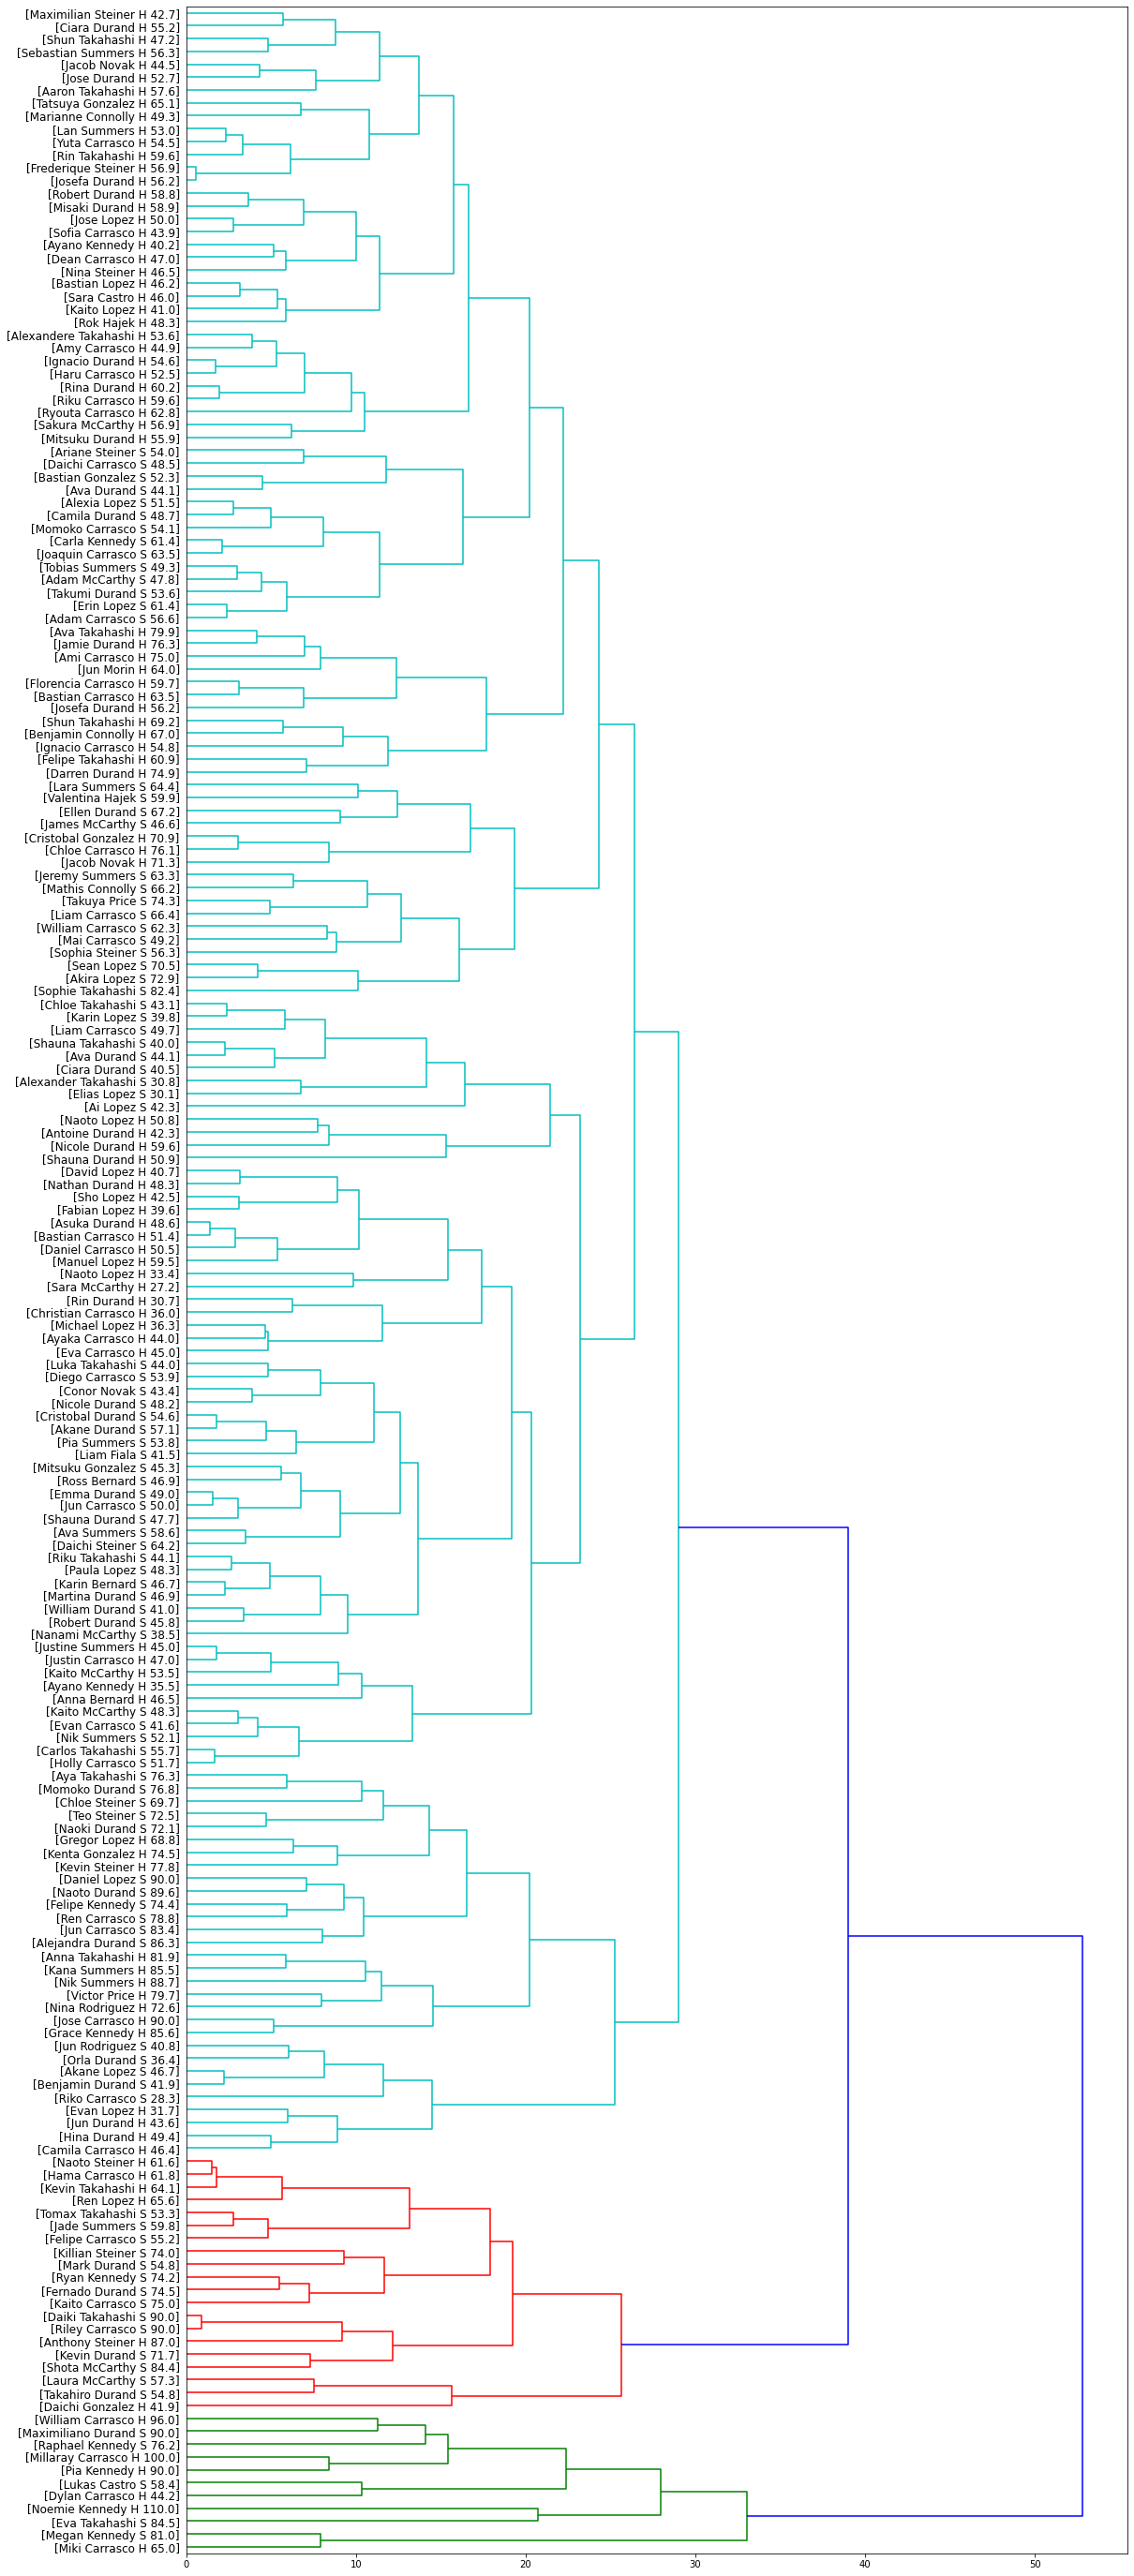

In [60]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s %s]' % (df2['first_name'][id], df2['last_name'][id], df2['Happy_Sad_group'][id], df2['Mem_Score_Before'][id])
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation = 'right')